In [1]:
# https://ibm.percipio.com/courses/d75e55a0-0f43-11e9-955f-dfb2ccb6c8a7/videos/f390cf50-0f43-11e9-955f-dfb2ccb6c8a7

## normally distributed data requires  that the data is evenly distributed
## skewness occurs for example , amongst all the footballers  tere are few wh have exceptionally  high salaries
## most of the players , in fact ,  will have normal salaries
## In such a case , the median income of a  professional soccer player , will be signifacntly lower than the average  or mean income  , which will be highly skewed 
# as a result of handful of elite players , whi have extremely high salaries 
# There are ways to measure the skewness  of  your data 
## there are ways to measure te skewness of the data 
## we will alo see , how to measure the kurtosis of the data set 
## and this is a way to measure , of how often  extreme values occur , on either side of the mean
## So , if our data set , is consisting of many points ,   some of which  are way more than 
##  3 sd  away of the mean , but  are symmetric about the mean value , 
## then  you will ahve low skewness , but high krtosis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.stats import kurtosis
from scipy.stats import skew 

# This is the stock data for Volkswagen in the year 2008. The stock price absolutely shoots up on 28-Oct due to some unexpected news. 

In [3]:
volkswagen_data = pd.read_csv('Datasets/volkswagen.csv', sep=",")

In [4]:
volkswagen_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,153.264999,154.975998,152.048996,152.177002,152.177002,6476
1,2008-01-03,152.602997,152.602997,149.042999,149.834000,149.834000,6985
2,2008-01-04,148.815002,148.815002,146.343002,147.194000,147.194000,22235
3,2008-01-07,146.343002,148.123001,146.343002,147.242996,147.242996,9285
4,2008-01-08,147.134003,148.449997,146.897003,147.085007,147.085007,5490


In [5]:
volkswagen_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
249,2008-12-19,306.529999,307.608002,280.821014,282.799011,282.799011,7611
250,2008-12-22,265.989014,266.019012,251.453995,263.962006,263.962006,2046
251,2008-12-23,262.062988,264.010986,257.040009,257.040009,257.040009,1618
252,2008-12-29,257.040009,257.040009,248.013000,251.285004,251.285004,2030
253,2008-12-30,250.167999,250.167999,247.212006,247.300995,247.300995,830


# We only need the adjusted close values. 

In [8]:
volkswagen_new_data = volkswagen_data.drop(['Open','High','Low','Close','Volume'], axis=1)

In [10]:
volkswagen_new_data.count()

Date         254
Adj Close    254
dtype: int64

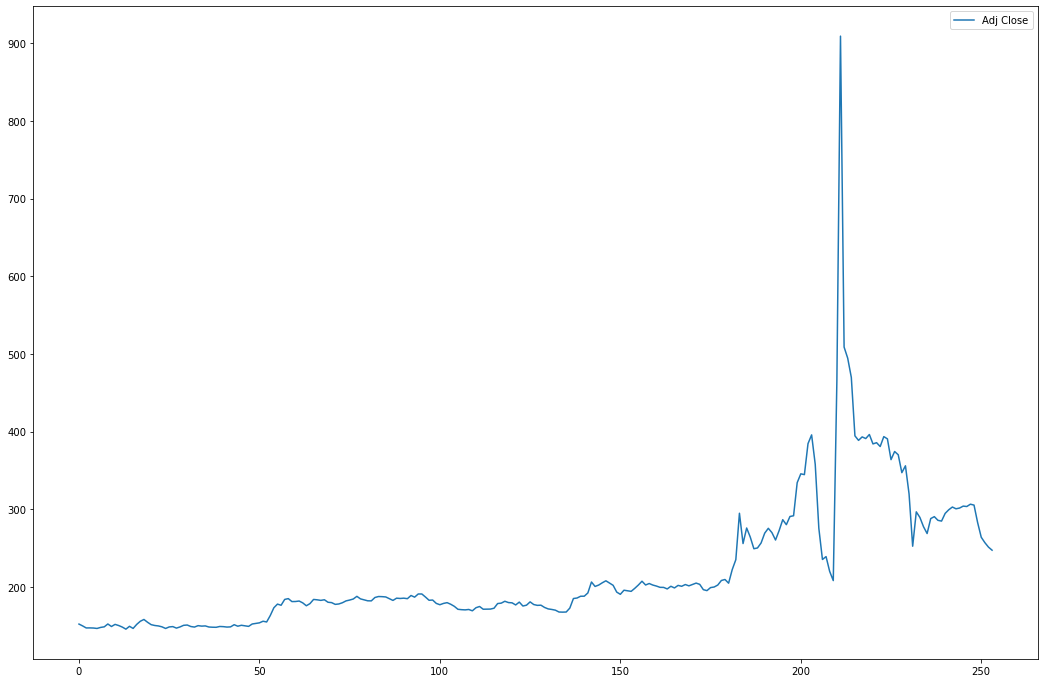

In [11]:
volkswagen_new_data.plot(figsize=(18,12))
plt.show()

In [12]:
volkswagen_new_data.dtypes

Date          object
Adj Close    float64
dtype: object

## convert the date object to datetime series

In [13]:
volkswagen_new_data['Date'] = pd.to_datetime(volkswagen_new_data['Date'])

In [14]:
volkswagen_new_data.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [18]:
volkswagen_new_data=volkswagen_new_data.sort_values(by='Date')

In [20]:
volkswagen_new_data.head(5)

,Date,Adj Close
0,2008-01-02,152.177002
1,2008-01-03,149.834000
2,2008-01-04,147.194000
3,2008-01-07,147.242996
4,2008-01-08,147.085007


# Calculating returns for the stock prices using the percentage change function

In [21]:
## make the datteime column as index 

In [24]:
volkswagen_new_data.set_index('Date',inplace=True)

In [25]:
volkswagen_new_data

,Adj Close
Date,
2008-01-02,152.177002
2008-01-03,149.834000
2008-01-04,147.194000
2008-01-07,147.242996
2008-01-08,147.085007
...,...
2008-12-19,282.799011
2008-12-22,263.962006
2008-12-23,257.040009


# calculate the  simple returns 

In [36]:
volkswagen_new_data['Returns'] = (volkswagen_new_data/volkswagen_new_data.shift(1))-1

In [37]:
volkswagen_new_data

,Adj Close,Returns
Date,,
2008-01-02,152.177002,NaN
2008-01-03,149.834000,-0.015397
2008-01-04,147.194000,-0.017619
2008-01-07,147.242996,0.000333
2008-01-08,147.085007,-0.001073
...,...,...
2008-12-19,282.799011,-0.073862
2008-12-22,263.962006,-0.066609
2008-12-23,257.040009,-0.026223


In [38]:
volkswagen_new_data.info()## check for not null values 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2008-01-02 to 2008-12-30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  254 non-null    float64
 1   Returns    253 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [42]:
volkswagen_new_data.dropna(inplace=True)

In [43]:
volkswagen_new_data.count()

Adj Close    253
Returns      253
dtype: int64

## find the skewness and kurtosis ,  for the set of functions , using scopy library 

In [44]:
skew(volkswagen_new_data['Returns'])

7.7043009107738385

In [45]:
kurtosis(volkswagen_new_data['Returns'])

81.3985824118732